第一题答案
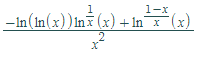

第二题答案
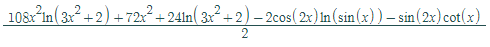

In [1]:
import pandas as pd
#code
df=pd.read_csv("questionnaire.csv",index_col=0)
df.head()

,math,physics,english
uid,,,
1.0,0.0,4.0,7.0
2.0,5.0,2.0,0.0
3.0,5.0,1.0,3.0
4.0,9.0,1.0,8.0
5.0,9.0,1.0,8.0


In [2]:
import numpy as np
import random
user_mat =np.array([[random.randint(1, 100) for i in range(10)] for j in range(10)])


In [3]:
initial_population = []

for x in range(10):
    user_mat = np.random.permutation(range(1, 101)).reshape((10,10))
    initial_population.append(user_mat)

In [4]:
initial_population

[array([[ 94,  71,  66,  41,  47,  38,  43,  50,   3,  77],
        [100,  36,  95,  46,   9,  81,  23,  93,  84,  89],
        [ 39,  31,  40,  51,  59,  18,  13,  34,  60,  22],
        [ 11,  96,  68,   8,  63,  48,  85,  79,  87,  26],
        [ 30,  64,  27,  44,  12,  53,  24,  69,   7,  97],
        [ 20,  74,  55,  99,  16,  70,  83,  10,  88,  72],
        [ 35,   1,  28,  76,  90,  19,   5,  92,  49,  21],
        [ 37,  15,  78,  86,  61,  65,  52,   6,  62,  54],
        [ 80,  14,  58,  42,  33,   2,  45,   4,  75,  57],
        [ 29,  17,  98,  82,  56,  73,  25,  67,  32,  91]]),
 array([[ 46,  24,  31,  21,  48,  10,   5,  98,  75,  82],
        [ 89,   7,  25,  39,  11,  76,  53,  27,  19,  92],
        [ 69,  64,  63,  42,  97,  65,  80,  41,  73,   9],
        [ 38,  68,  74,  91,  35,  32,  70,  62,  40,  67],
        [ 47,  16,  18,   6,  71,  84,  17,  88,  58,  79],
        [ 49,  86,  94,  85,  95,  15,  56,  90,  33,  52],
        [  8,  23,  57,   4,  99,  37,

In [5]:
from scipy.spatial.distance import pdist

def calculate_interest_distance(person, *others):
    people = [df.ix[person, 0:3]]
    for other in others:
        if other:
            people.append(df.ix[other, 0:3])

    return np.average(pdist(people, 'cityblock')) if len(people) > 1 else 0

In [6]:
def get_element_safe(sequence, position):
    try:
        return sequence.item(position)
    except IndexError:
        return None

In [7]:
def calculate_chromosome_fitness(chromosome):
    fitnesses = []
    for index, gene in np.ndenumerate(chromosome):
        next_to = calculate_interest_distance(gene,
                                             get_element_safe(chromosome, (index[0], index[1] - 1)),
                                             get_element_safe(chromosome, (index[0], index[1] + 1)))
        in_front = calculate_interest_distance(gene,
                                              get_element_safe(chromosome, (index[0]-1, index[1])))
                                            
        behind = calculate_interest_distance(gene,
                                           get_element_safe(chromosome, (index[0]+1, index[1])))
        fitnesses.append(sum([next_to, in_front, behind]) / 3)
    return np.average(fitnesses)

In [8]:
generations = []

for chromosome in initial_population:
    generations.append({
        "generation": 0,
        "fitness": calculate_chromosome_fitness(chromosome),
        "chromosome": chromosome,
        "active": True
    })

E:\0Software\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
E:\0Software\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [9]:
#以 fitness 为 key，为generations排序
def ascSort(generations, key):
    for i in range(len(generations) - 1):
        for j in range(len(generations) - 1 - i):
            if (generations[j][key]) > (generations[j + 1][key]):
                generations[j], generations[j + 1] = generations[j + 1], generations[j]
    return generations
generations=ascSort(generations,"fitness")
generations

[{'generation': 0,
  'fitness': 9.152222222222221,
  'chromosome': array([[ 88,  16,  78,  83,  53,  80,  58,  37,  60,  57],
         [ 84,  30,  31,  40,  92,  23,  98,  41,  69,  48],
         [ 11,  34,   3,  76,  87,   4,  71,  35,  51,  99],
         [ 63,  46,  22,  44,  32,  91,  89,  64,  94,  19],
         [ 29,  38,  21,   6,  28,  70,  95,  68,  17,  90],
         [ 43,  65,  54,  45,   8,  81,  27,  62,  93,  33],
         [ 24,  52,  13,  82,   1,  96,  66,  59,  49,  79],
         [  2,   7,  18,  85,  77,  73,  12,  86,  56,   9],
         [ 97,  67,  47,  14,  15, 100,  10,  75,  25,  72],
         [ 42,  61,  55,  36,  20,  39,  26,   5,  74,  50]]),
  'active': True},
 {'generation': 0,
  'fitness': 9.306666666666667,
  'chromosome': array([[ 50,  58,  75,  84,  89,  51,  94,  17,  88,  59],
         [ 70,  43,  61,  11,  52,  80,  32,  47,   5,   3],
         [ 27,  76,   9,  25,  54,  99,  62,  38,  28, 100],
         [ 90,  60,  98,  64,   4,  96,  41,  69,  44,  

In [11]:
import random

def recombine(mother, father):
    child = np.ones((10,10)) * -1
    # 遍历每个用户
    for index, uid in enumerate(df.index):
        if uid <= 50:
            # 如果uid <=50，则position为mother中该uid的位置
            position = np.where(mother == uid)
        else:
            # 如果uid > 50，则position为father中该uid的位置
            position = np.where(father == uid)
        
        if child[position] != -1:
            # 处理冲突
            filtered = np.where(np.equal(child, -1))
            position = random.choice(list(zip(filtered[0], filtered[1])))

        child[position] = uid

    return child

In [12]:
import random

def mutate_chromosome(chromosome):
    first = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))
    second = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))

    chromosome[first[0], first[1]], chromosome[second[0], second[1]] = chromosome[second[0], second[1]], chromosome[first[0], first[1]]
    return chromosome

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_population(population, generation):
   # get_ids = np.vectorize(get_id)
    figure, axes = plt.subplots(1, 10, figsize=(20, 3))

    for index, chromosome in enumerate(population):
        ids = chromosome
        axes[index].imshow(ids, interpolation="nearest", cmap=plt.cm.plasma)
        subplot_title = "Chromosome " + str(index)
        axes[index].set_title(subplot_title)

    plot_title = "Generation " + str(generation)
    figure.suptitle(plot_title)
    plt.show()

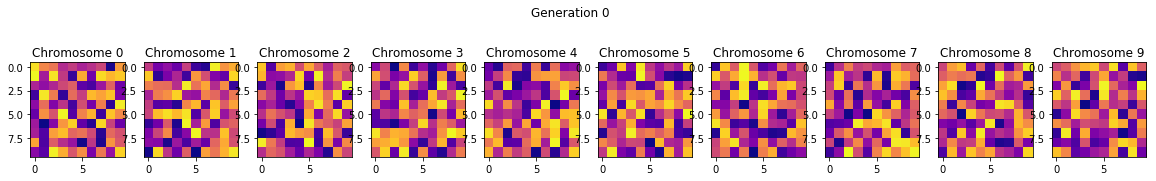

In [14]:
draw_population(initial_population, 0)

In [16]:
import copy

most_fit = []

# 当前的适应度
max_fitness = None

# 适应度最高的染色体
fittest_chromosome = None

In [17]:
### 从generations取出某一代的所有染色体，并排序
def get_chromosomes_in_generation(generations, generation_num):
    # Get only the chromosomes in this generation
    generation = list(filter(lambda k: k['generation'] == generation_num, 
                             generations))
    return sorted(generation, key=lambda k: k['fitness'])


### 更新 most_fit / max_fitness / fittest_chromosome 
def sort_chromosomes(generation, most_fit):
    max_fitness = generation[0]['fitness']
    most_fit.append(max_fitness)
    fittest_chromosome = generation[0]['chromosome']
    return most_fit, fittest_chromosome

In [18]:
# 请将以下Comment 添加到代码的合适位置
# A. 将适应度最高的两条染色体交配
# B. 将新一代染色体加入到generations中并返回
# C. 将适应度最差的两个染色体杀掉
# D. 找到仍存活的染色体，并更新代数
# E. 将适应度第三和第四高的两条染色体交配


def copy_chromosomes(generation, generations):
    new_generation = copy.deepcopy(generation)
    # C. 将适应度最差的两个染色体杀掉
    new_generation[-1]['active'] = False
    new_generation[-2]['active'] = False
    # D. 找到仍存活的染色体，并更新代数
    active = list(filter(lambda k: k['active'] == True, new_generation))
    for chromosome in active:
        chromosome['generation'] += 1
    
    # B. 将新一代染色体加入到generations中并返回
    generations.extend(active)
    return generations


def mate_chromosomes(generation, generations, generation_num):
    # A. 将适应度最高的两条染色体交配
    child = recombine(generation[0]['chromosome'], generation[1]['chromosome'])
    child = mutate_chromosome(child)
    generations.append({
      "active": True,
      "chromosome": child,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(child)
    })
     # E. 将适应度第三和第四高的两条染色体交配
    other = recombine(generation[2]['chromosome'], generation[3]['chromosome'])
    other = mutate_chromosome(chromosome)
    generations.append({
      "active": True,
      "chromosome": other,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(other)
    })
    return generations

In [19]:
def run_ga(input_generations):
    fittest = []
    max_fitness = None
    fittest_chromo = None
    for generation_num in range(50):
        if max_fitness and max_fitness < 5:
            break

        generation = get_chromosomes_in_generation(input_generations, generation_num)
        fittest, fittest_chromo = sort_chromosomes(generation, most_fit)

        input_generations = copy_chromosomes(generation, input_generations)
        input_generations = mate_chromosomes(generation, input_generations, generation_num)

        draw_population(map(lambda d: d['chromosome'], 
                        get_chromosomes_in_generation(input_generations, generation_num)), generation_num)

    return fittest, fittest_chromo

E:\0Software\anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
E:\0Software\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
E:\0Software\anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


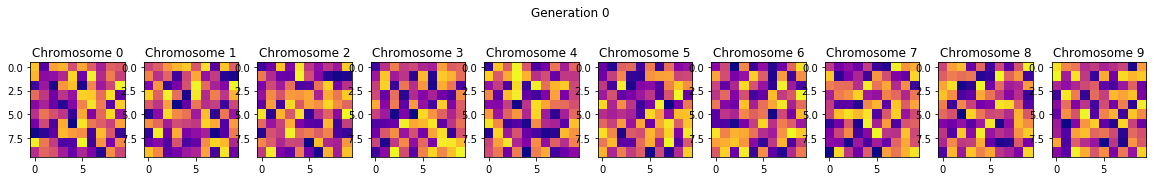

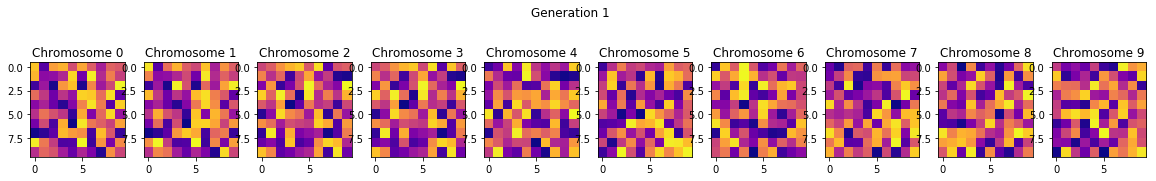

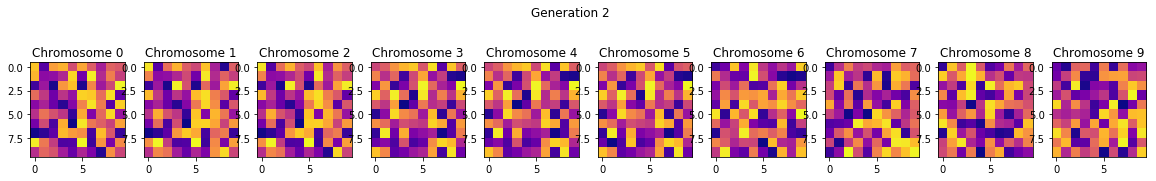

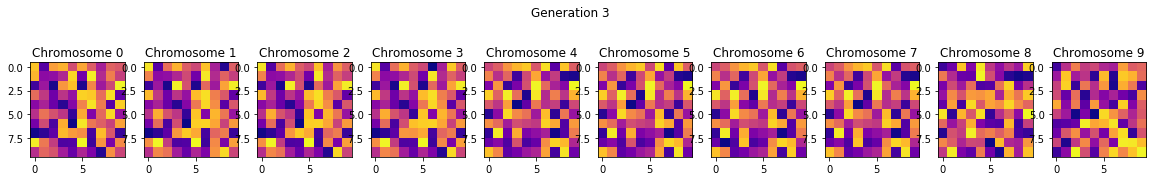

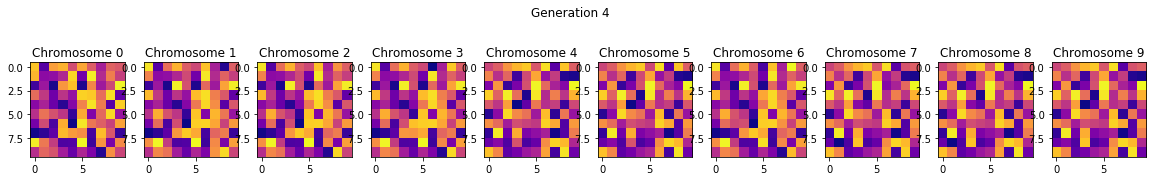

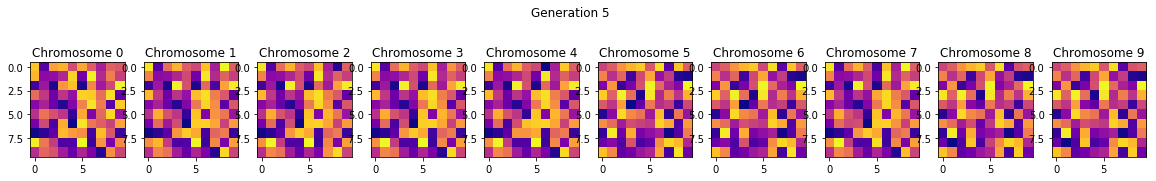

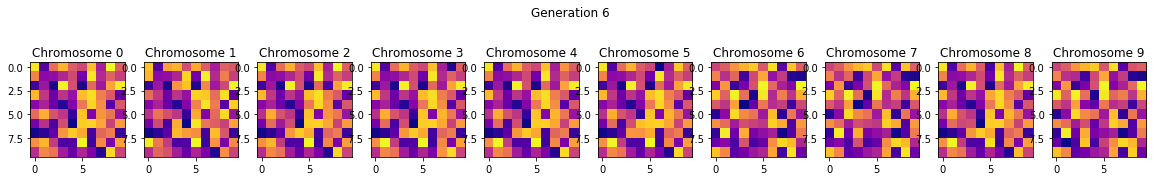

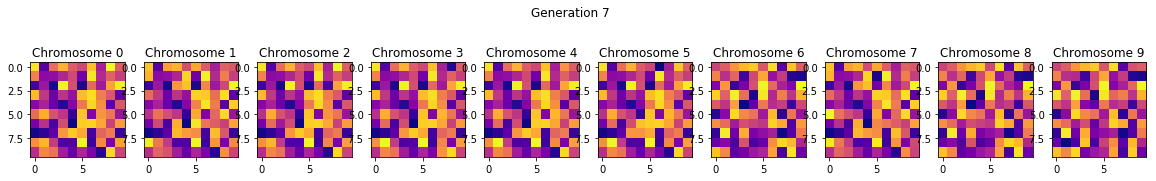

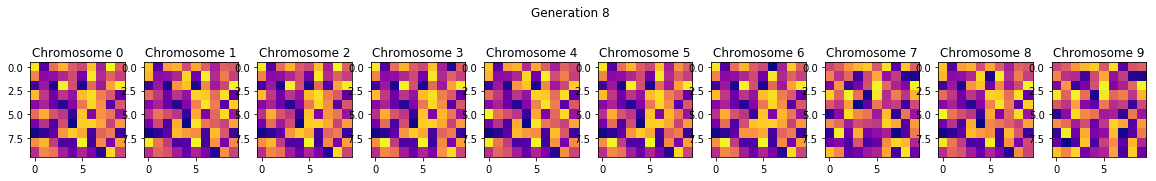

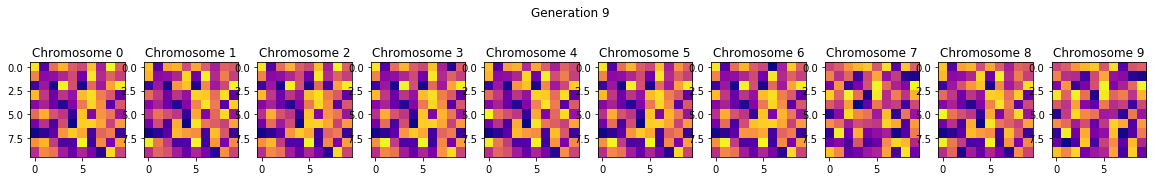

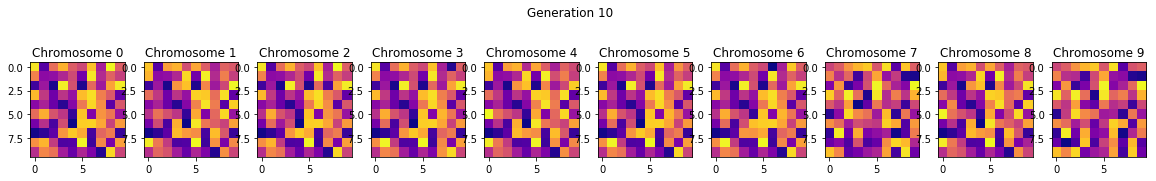

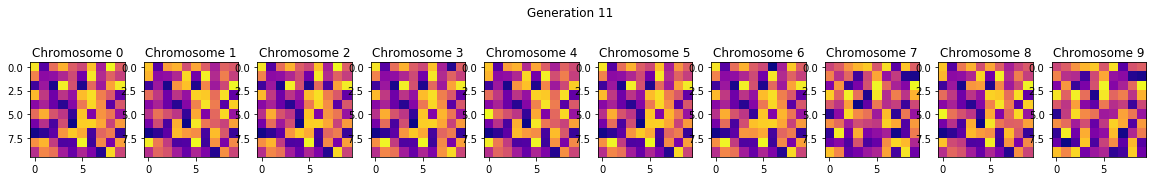

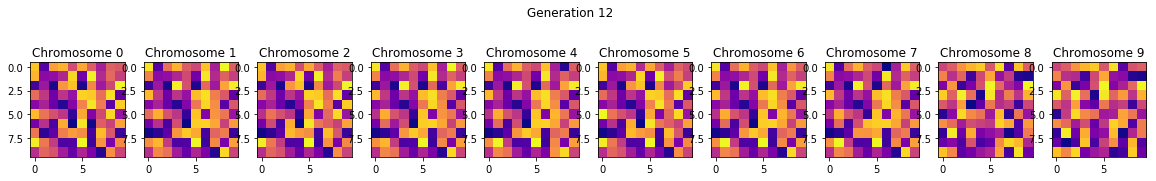

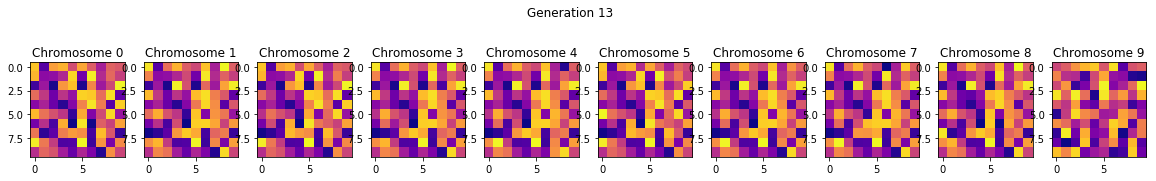

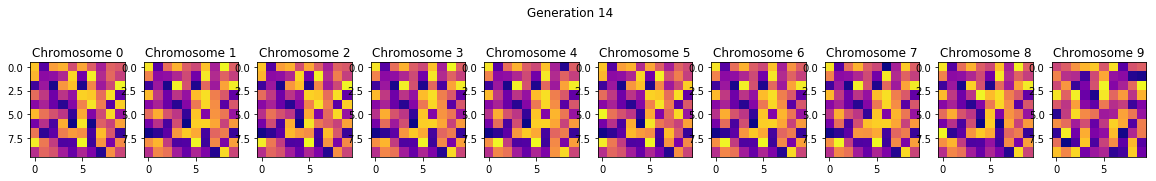

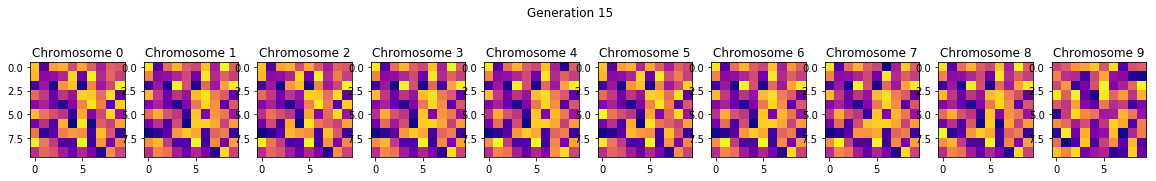

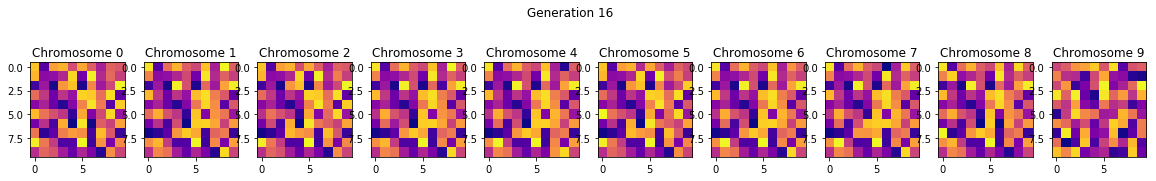

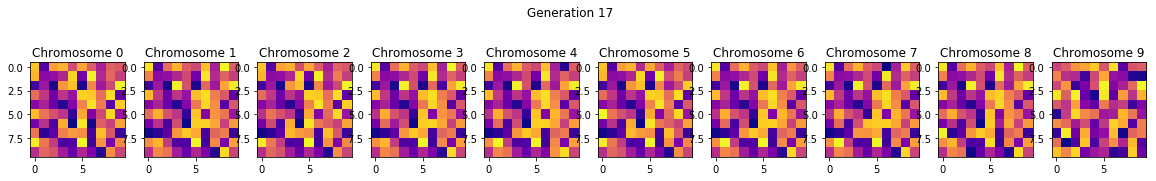

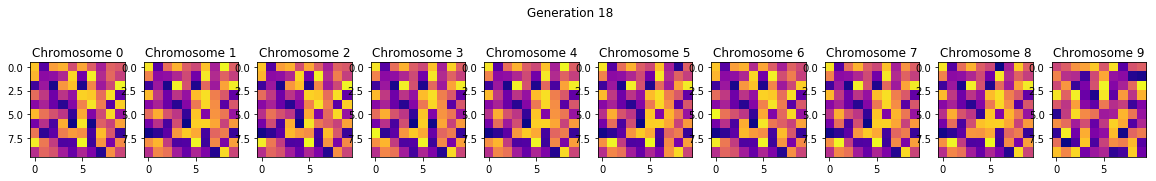

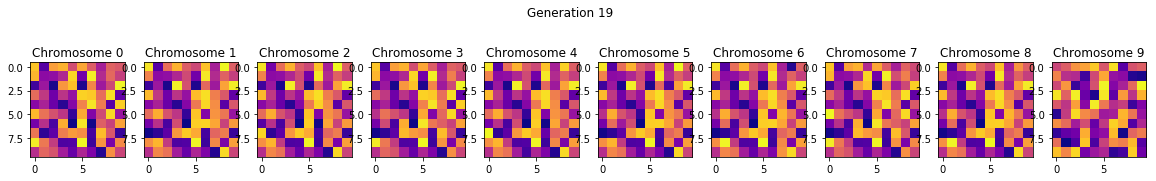

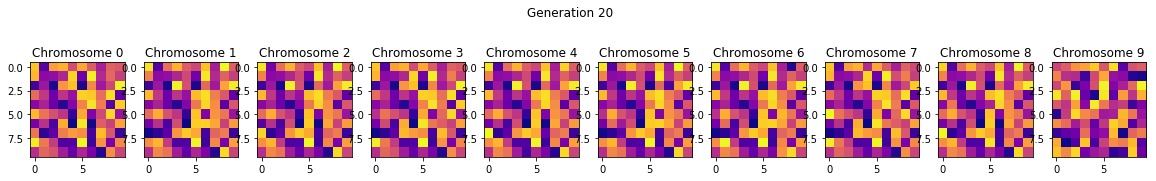

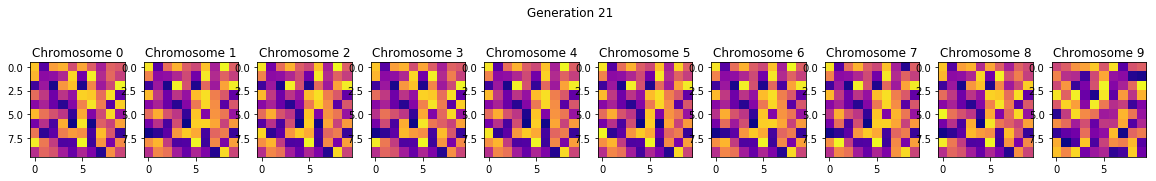

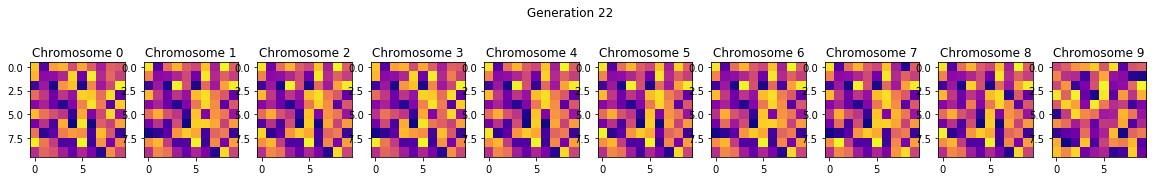

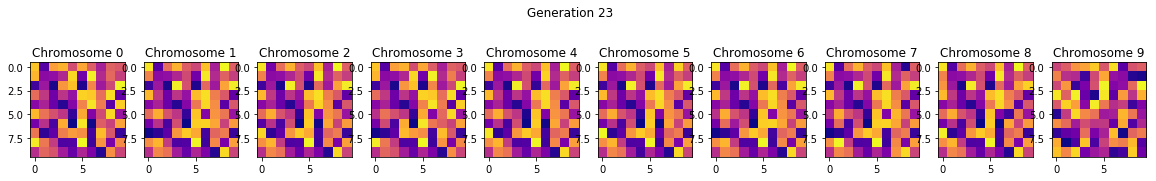

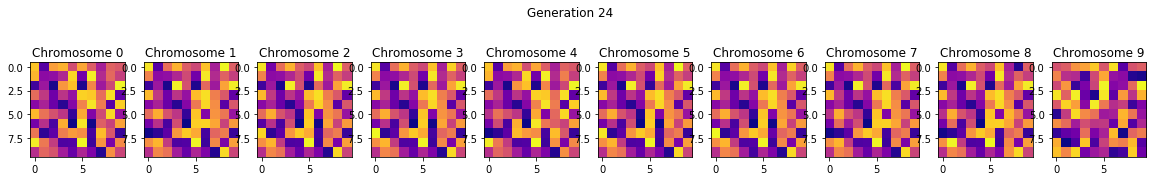

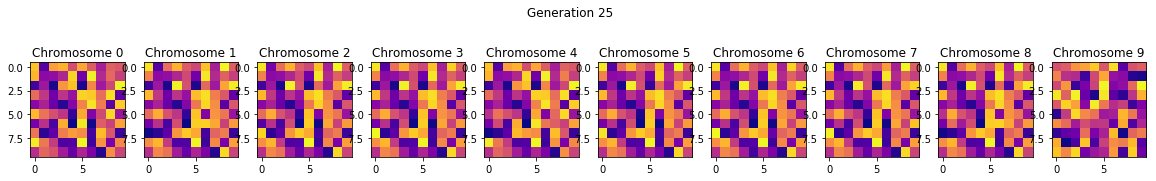

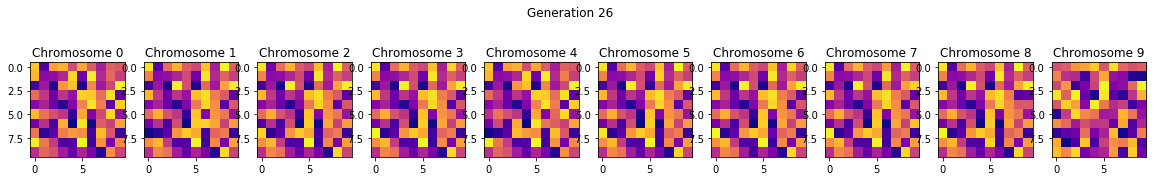

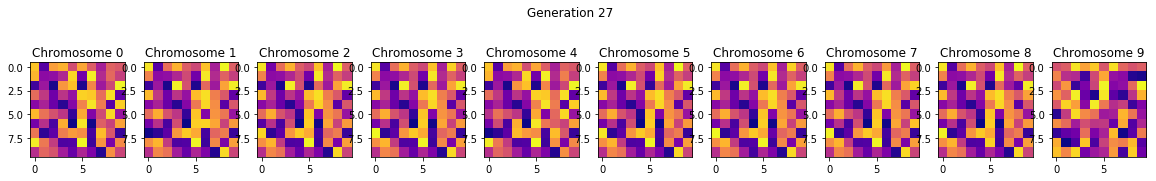

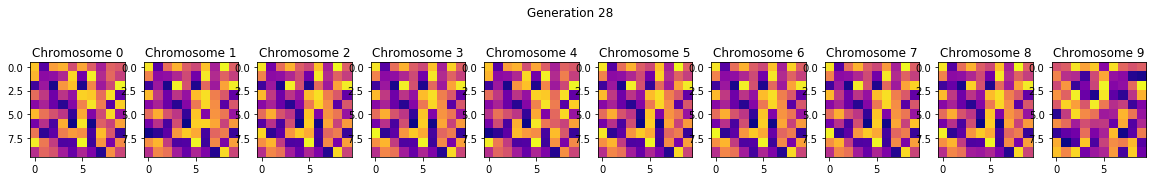

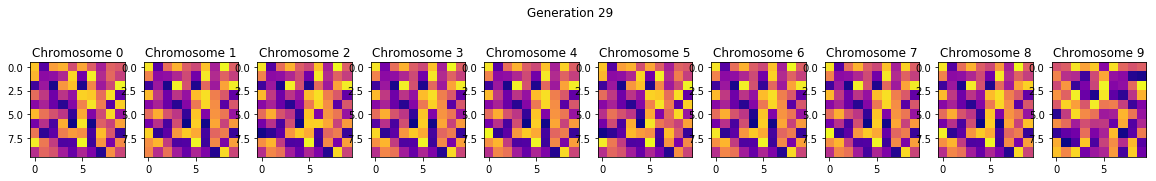

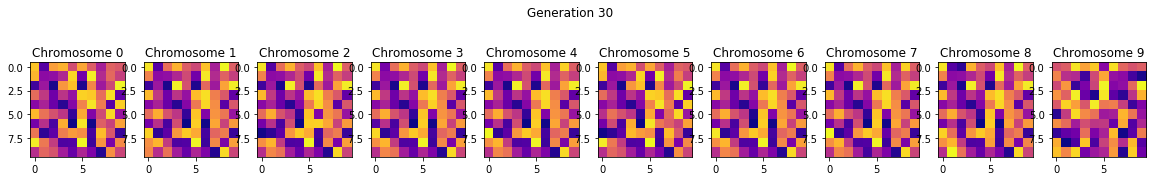

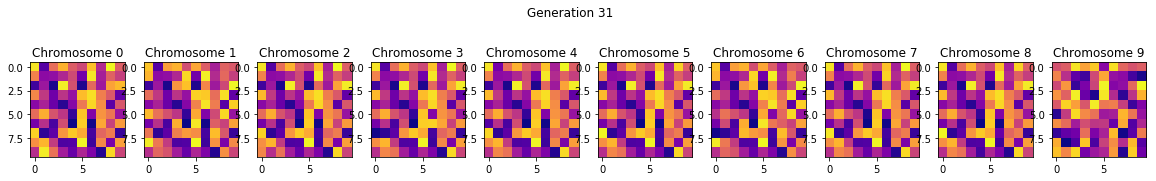

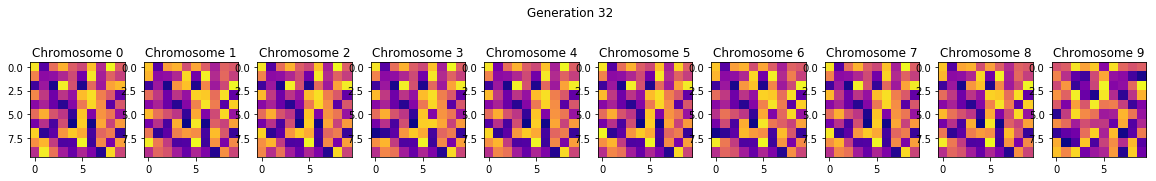

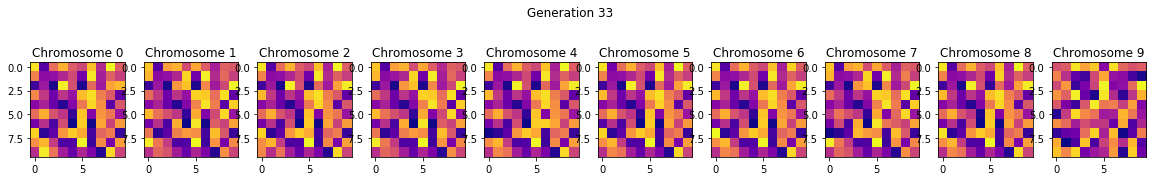

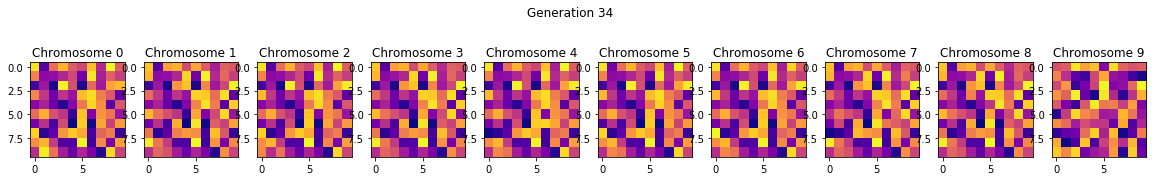

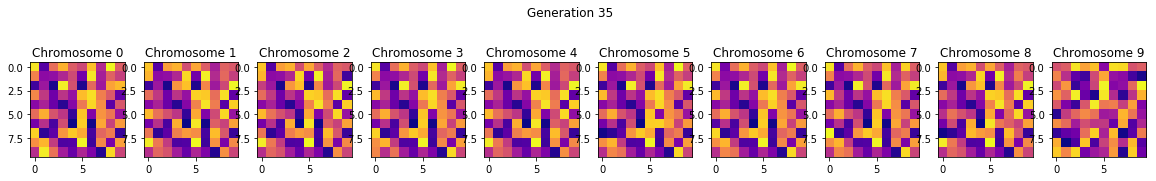

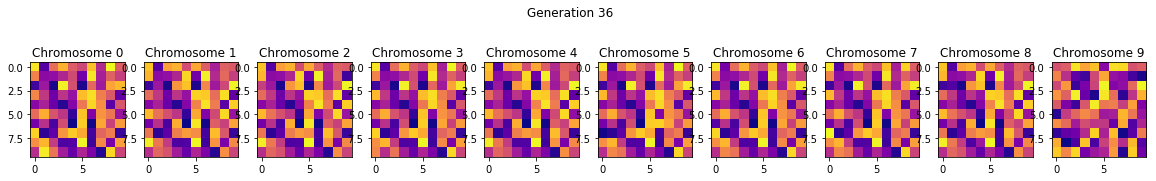

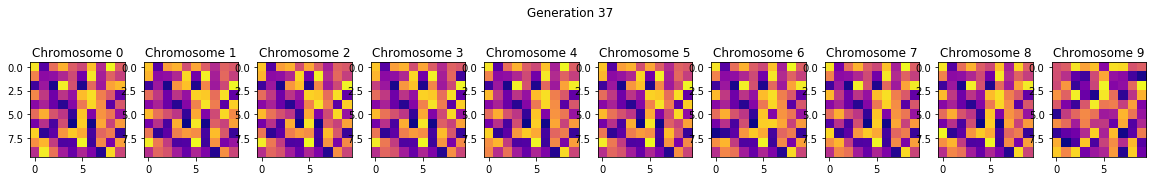

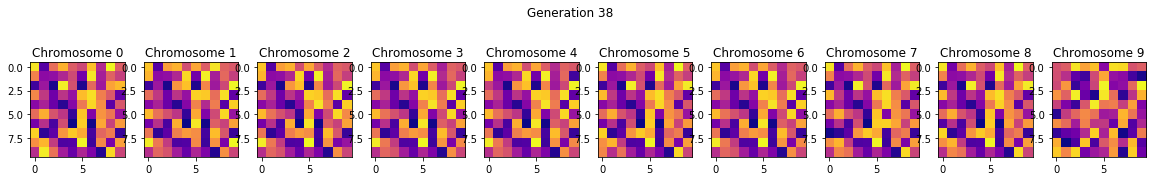

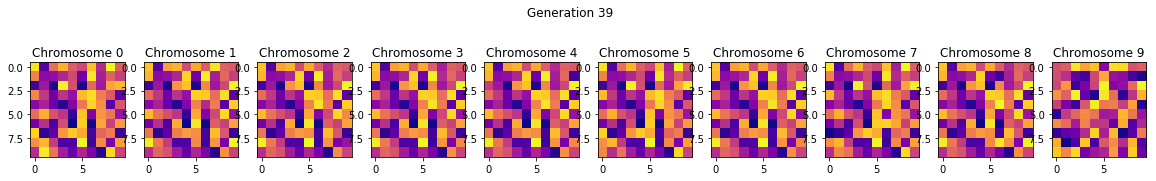

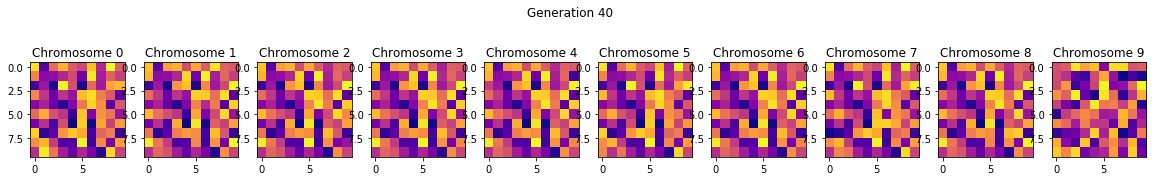

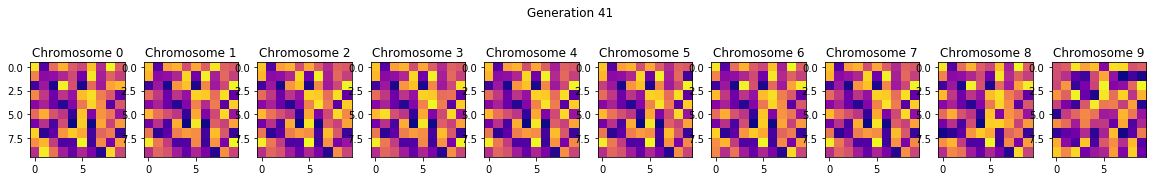

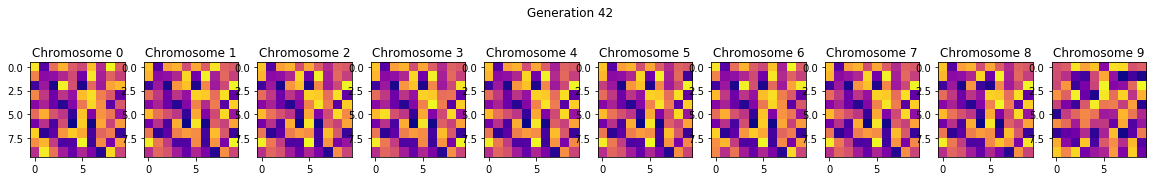

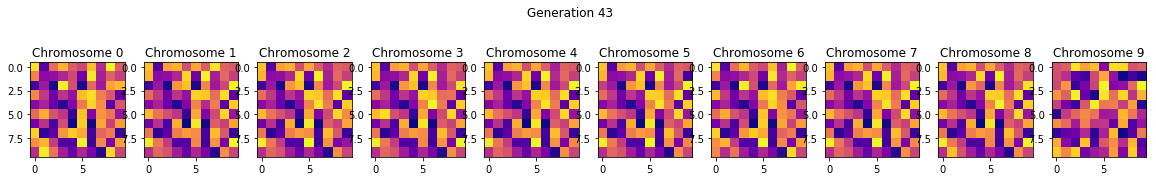

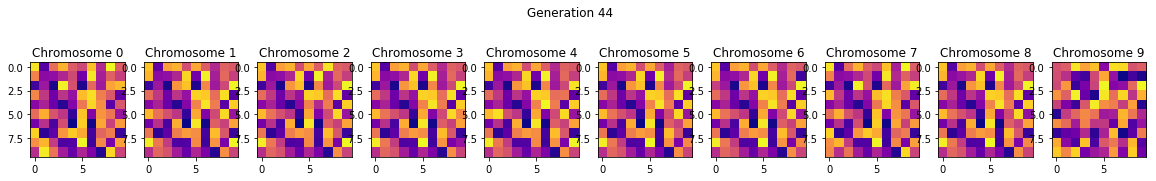

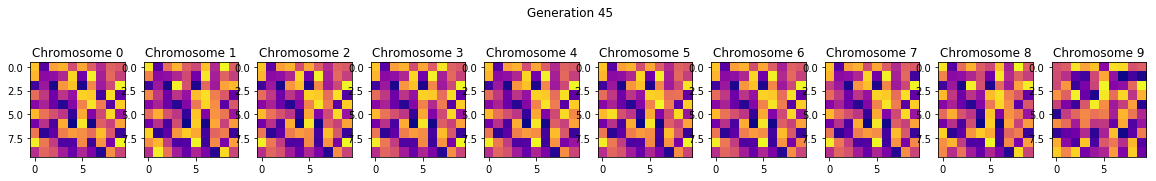

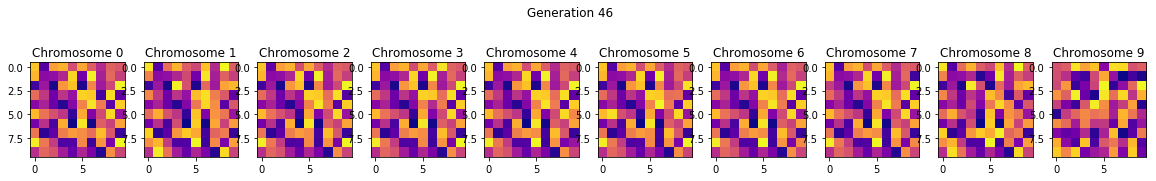

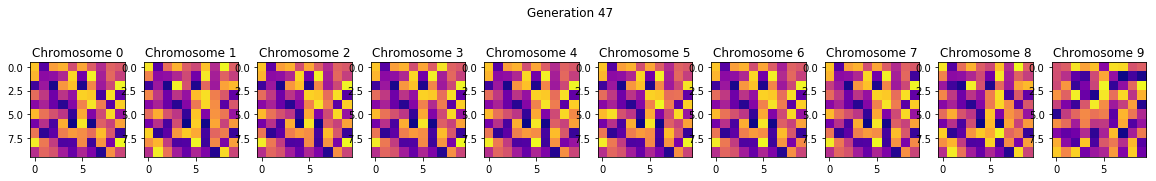

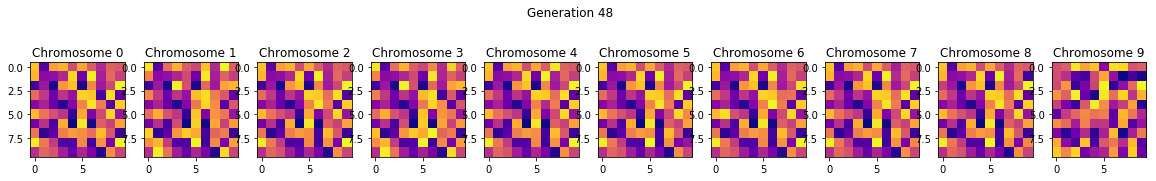

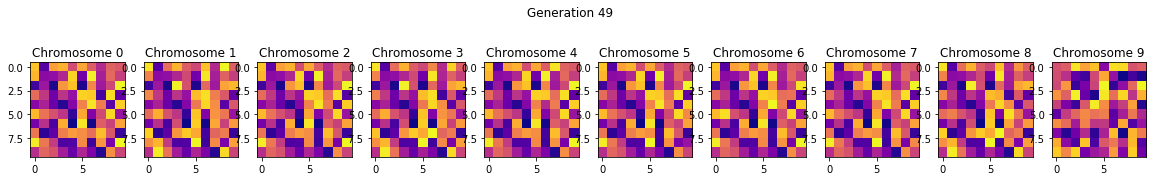

In [20]:

most_fit, fittest_chromosome = run_ga(generations)

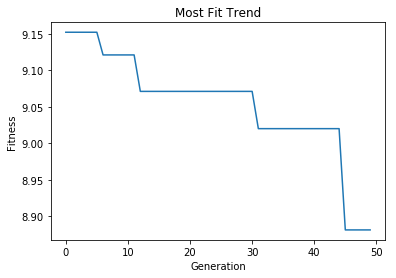

In [21]:
plt.plot(most_fit)
plt.title("Most Fit Trend")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [22]:
fittest_chromosome

array([[ 88.,  16.,  78.,  83.,  53.,  80.,  58.,  41.,  60.,  57.],
       [ 84.,  30.,  31.,  40.,  92.,  23.,  98.,  37.,  62.,  48.],
       [ 11.,  34.,   3.,  76.,  87.,   4.,  71.,  35.,  51.,  99.],
       [ 63.,  46.,  22.,  44.,  32.,  91.,  89.,  12.,  94.,  19.],
       [ 29.,  38.,  21.,   6.,  28.,  70.,  95.,  68.,  17.,  90.],
       [ 85.,  65.,  54.,  45.,   8.,  81.,  27.,  52.,  93.,  33.],
       [ 24.,  43.,  13.,  82.,   1.,  96.,   2.,  59.,  49.,  79.],
       [ 66.,   7.,  18.,  69.,  77.,  73.,  64.,  86.,  56.,   9.],
       [ 97.,  67.,  47.,  14.,  15.,  72.,  10.,  75.,  25., 100.],
       [ 42.,  61.,  55.,  36.,  20.,  39.,  26.,   5.,  74.,  50.]])